### Hopfield Networks
#### 課題Ⅰ
##### Ⅰ- 1
1. 2つのパターンを与え、重み行列wを作成
2. エネルギー関数を用いて想起させる(平衡状態)
3. 0.1程度のノイズを加えたテストデータを与え、正しく記憶できているか確認

##### Ⅰ- 2
1. 記憶させるパターン数を増やしていく
2. どの程度までパターン数を増やせるか調査

In [14]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt

In [21]:
""" 重み行列Wを計算 """
def fit(dim, data):
    w = np.zeros([dim, dim])
    print(w.shape)
    for i in data:
        w += np.outer(i, i.T)
    for i in range(dim):
        # 対角成分を0にする
        w[i][i] = 0
    return w





In [3]:
''' エネルギー関数E(x)を定義し、収束するまで繰り返す '''
def energy(self, data, w):
    e = -0.5 * np.dot(w, np.dot(data, data.T))


In [5]:
# """ テストデータから想起する """
# def recollect(test_data):
    

In [16]:
# """ データにノイズを加える """
def noise(noise, data):
    for i, d in enumerate(data):
        corrupted = np.copy(d)
        inv = np.random.binomial(n=1, p=noise, size=len(d))

        for j, v in enumerate(d):
            if inv[j]:
                corrupted[j] = -1 * v
    return corrupted

In [36]:
import numpy as np

two = np.array([
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],  
                [0,+1, 0, 0, 0, 0, 0],
                [0,+1, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]])

nine=np.array([ 
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]
                ])

# data = np.array([[
#         0, 0, 0, 0, 0, 0, 0,
#         0,+1,+1,+1,+1,+1, 0,
#         0, 0, 0, 0, 0,+1, 0,
#         0, 0, 0, 0, 0,+1, 0,
#         0,+1,+1,+1,+1,+1, 0,  
#         0,+1, 0, 0, 0, 0, 0,
#         0,+1, 0, 0, 0, 0, 0,
#         0,+1,+1,+1,+1,+1, 0,
#         0, 0, 0, 0, 0, 0, 0
#     ], 
#     [
#         0, 0, 0, 0, 0, 0, 0,
#         0,+1,+1,+1,+1,+1, 0,
#         0,+1, 0, 0, 0,+1, 0,
#         0,+1, 0, 0, 0,+1, 0,
#         0,+1,+1,+1,+1,+1, 0,
#         0, 0, 0, 0, 0,+1, 0,
#         0, 0, 0, 0, 0,+1, 0,
#         0, 0, 0, 0, 0,+1, 0,
#         0, 0, 0, 0, 0, 0, 0
#     ]
# ])

two = [2 * i - 1 for i in two]
nine = [2 * i - 1 for i in nine]
data = np.stack([two, nine])
# ニューロン数
n = 63
# 記憶させたいパターン数
k = 2

w = fit(n, data)
# print(w)
test_data = noise(0.1, data[0])


# np.save('test.npy', w)


(63, 63)
[[[-1 -1 -1 -1 -1 -1 -1]
  [-1  1  1  1  1  1 -1]
  [-1 -1 -1 -1 -1  1 -1]
  [-1 -1 -1 -1 -1  1 -1]
  [-1  1  1  1  1  1 -1]
  [-1  1 -1 -1 -1 -1 -1]
  [-1  1 -1 -1 -1 -1 -1]
  [-1  1  1  1  1  1 -1]
  [-1 -1 -1 -1 -1 -1 -1]]

 [[-1 -1 -1 -1 -1 -1 -1]
  [-1  1  1  1  1  1 -1]
  [-1  1 -1 -1 -1  1 -1]
  [-1  1 -1 -1 -1  1 -1]
  [-1  1  1  1  1  1 -1]
  [-1 -1 -1 -1 -1  1 -1]
  [-1 -1 -1 -1 -1  1 -1]
  [-1 -1 -1 -1 -1  1 -1]
  [-1 -1 -1 -1 -1 -1 -1]]]


In [49]:
# np.set_printoptions(threshold=np.inf)
# print(np.load('./test.npy'))
wData = np.load('./test.npy')

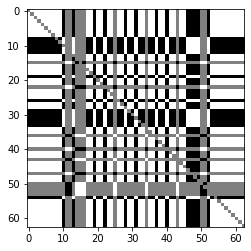

In [52]:
import matplotlib.pyplot as plt
plt.imshow(wData)
plt.gray()
plt.show()

In [20]:
import numpy as np
data = np.load('train_data.npy', allow_pickle=True)
# print(len(data))
print(data)

# for j in range(len(data)):
#     for i, d in enumerate(data[j]):
#         print(f"{d:3d} ", end="")
#         if i % 5 == 4 and i != 0:
#             print("\n")
#     print('\n')

[[-1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1
  -1]
 [ 1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1
   1]
 [ 1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1
   1]
 [ 1 -1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1
  -1]
 [-1  1  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1
   1]
 [-1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1
   1]]


In [75]:
def get_corrupted_input(input, corruption_level):
    """
    入力にノイズを付与
    """
    corrupted = np.copy(input)
    inv = np.random.binomial(n=1, p=corruption_level, size=len(input))
    for i, v in enumerate(input):
        if inv[i]:
            corrupted[i] = -1 * v
    return corrupted

In [69]:
two = np.array([
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],  
                [0,+1, 0, 0, 0, 0, 0],
                [0,+1, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]])
print(two.shape[0])
data = two.flatten()
test_data = test_make(data)
for i, v in enumerate(test_data):
    if i % 7 == 0 and i != 0:
        print('\n')
    print(f"{v:3d}", end="")
print("\n")
cnt = 0
for i in range(63):
    if test_data[i] != data[i]:
        cnt += 1
print(f"一致率 : {1 - cnt/n:2f}")
# print(test_data)
# test_data = [get_corrupted_input(d, 0.5) for d in two]

9
  0  0  0  0  0  0  0

  0  1  1  1  1  1  0

  0  0  0  0  0  1  0

  0  0  0  0  0  1  0

  0  1  1  1  1  1  0

  0 -1  0  0  0  0  0

  0  1  0  0  0  0  0

  0  1  1  1  1  1  0

  0  0  0  0  0  0  0

一致率 : 0.984127


In [124]:
test = get_corrupted_input(data, 0.2)
# for i, v in enumerate(inv):
#     if i % 7 == 0 and i != 0:
#         print('\n')
#     print(f"{v:3d}", end="")
# print("\n")

In [125]:
# for i, v in enumerate(test):
#     if i % 7 == 0 and i != 0:
#         print('\n')
#     print(f"{v:3d}", end="")
# print("\n")

In [126]:
cnt = 0
for i in range(63):
    if test[i] != data[i]:
        cnt += 1
print(f"一致率 : {1 - cnt/n:2f}")

一致率 : 0.888889


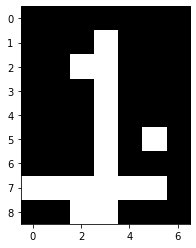

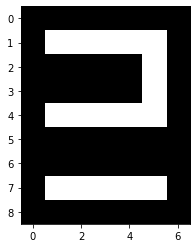

In [65]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)


""" 重み行列Wを計算 """
def fit(dim, data):
    w = np.zeros([dim, dim])
    # for _ in range(10):
    for i in data:
        w += np.outer(i, i.T)

    for i in range(dim):
        w[i][i] = 0     # 対角成分を0にする
    return w

""" 学習データにノイズを与え、テストデータを作成 """
def noise(data, rate):
    test_data = np.copy(data)
    inv = np.random.binomial(n=1, p=rate, size=len(data))
    for i, v in enumerate(data):
        if inv[i]:
            test_data[i] = -1 * v
    return test_data

''' エネルギー関数E(x)を定義し、収束するまで繰り返す '''
def energy(data, w):
    return -0.5 * np.dot(w, np.dot(data, data.T))
    # return e

""" エネルギーが変化しなくなるまで更新を行う """
# def predict(test_data, w, loop=100):
#     e = energy(test_data, w)
#     # test_data = np.dot(w, test_data)
#     # test_data = np.sign(test_data)
#     # e_new = energy(test_data, w)
#     # if np.array_equal(e, e_new):
#     #     print("a")

#     # print(e.shape, e_new.shape)
#     for i in range(loop):
#         test_data = np.dot(w, test_data)
#         # xr の符号をとる
#         test_data = np.sign(test_data)
#         e_new = energy(test_data, w)
#         if np.array_equal(e, e_new):
#             print(i)
#             return test_data
#         e = e_new
#     return test_data    

def predict(test_data, w):
    e_old = float("inf")
    for _ in range(300):  # self.loop_updateは更新の上限値
        # テストデータの更新とエネルギーの計算
        test_data = np.sign(np.dot(w, test_data))
        e_new = energy(test_data, w)

        # エネルギーが変化しなくなったら打ち切り
        if np.array_equal(e_old, e_new):
            break

        e_old = e_new

    return test_data
        
           
            
        
    


def main():
    two = np.array([
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],  
                [0,+1, 0, 0, 0, 0, 0],
                [0,+1, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]])

    nine=np.array([ 
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]
                ])
    one = np.array([ 
                [0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0,+1,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]])

    two = [2 * i - 1 for i in two]
    nine = [2 * i - 1 for i in nine]
    one = [2 * i - 1 for i in one]
    data = np.stack([one, two, nine])

    # ニューロン数
    n = 63
    # 記憶させたいパターン数
    k = 2
    # 学習データにどの程度ノイズを加えるか
    noise_rate = 0.1
    w = fit(n, data)

    
    flatten_two = data[0].flatten()
    test = noise(flatten_two, noise_rate)

    flatten_test = test.reshape(9, 7)
    plt.imshow(flatten_test)
    plt.gray()
    plt.show()

    # for i, v in enumerate(test):
    #     if i % 7 == 0 and i != 0:
    #         print('\n')
    #     print(f"{v:3d}", end="")
    # print("\n")
    
    predicted = predict(test, w)
    predicted = np.array(predicted, dtype='int')
    
    # for i, v in enumerate(predicted):
    #     if i % 7 == 0 and i != 0:
    #         print('\n')
    #     print(f"{v:3d}", end="")
    # print("\n")
    flatten_predicted = predicted.reshape(9, 7)
    plt.imshow(flatten_predicted)
    plt.gray()
    plt.show()

if __name__ == '__main__':
    main()

In [67]:
data = [
        np.array([
                [0, 0, 0, 0, 0, 0, 0], 
                [0,+1,+1,+1,+1,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]]),

        np.array([
                [0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0,+1,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0, 0, 0,+1, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]]),
                

        np.array([
                [0,  0,  0,  0,  0,  0,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0,  0,  0,  0,  0, +1,  0],
                [0,  0,  0,  0,  0, +1,  0],
                [0, +1, +1, +1, +1, +1,  0],  
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0,  0,  0,  0,  0,  0,  0]]),

        np.array([
                [0,  0,  0,  0,  0,  0,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0,  0,  0,  0,  0, +1,  0],
                [0,  0,  0,  0,  0, +1,  0],
                [0,  0,  0, +1, +1, +1,  0], 
                [0,  0,  0,  0,  0, +1,  0],
                [0,  0,  0,  0,  0, +1,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0,  0,  0,  0,  0,  0,  0]]),

        np.array([
                [0,  0,  0,  0,  0,  0,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1,  0, +1,  0,  0,  0],
                [0, +1, +1, +1, +1,  0,  0],
                [0,  0,  0, +1,  0,  0,  0],
                [0,  0,  0, +1,  0,  0,  0],
                [0,  0,  0, +1,  0,  0,  0],
                [0,  0,  0,  0,  0,  0,  0]]),

        np.array([
                [0,  0,  0,  0,  0,  0,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0,  0,  0,  0,  0, +1,  0],
                [0,  0,  0,  0,  0, +1,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0,  0,  0,  0,  0,  0,  0]]),

        np.array([
                [0,  0,  0,  0,  0,  0,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0, +1,  0,  0,  0, +1,  0],
                [0, +1,  0,  0,  0, +1,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0,  0,  0,  0,  0,  0,  0]]),

        np.array([
                [0,  0,  0,  0,  0,  0,  0],
                [0, +1, +1, +1, +1, +1,  0],
                [0,  0,  0,  0,  0, +1,  0],
                [0,  0,  0,  0, +1,  0,  0],
                [0,  0,  0, +1,  0,  0,  0],
                [0,  0, +1,  0,  0,  0,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0, +1,  0,  0,  0,  0,  0],
                [0,  0,  0,  0,  0,  0,  0]]),

        np.array([
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]]),

        np.array([ 
                [0, 0, 0, 0, 0, 0, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1, 0, 0, 0,+1, 0],
                [0,+1,+1,+1,+1,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0,+1, 0],
                [0, 0, 0, 0, 0, 0, 0]])
]

In [68]:
np.save('numbers.npy', data)

In [69]:
data = np.load('numbers.npy')


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [70]:
data.shape

(10, 9, 7)

テストデータ


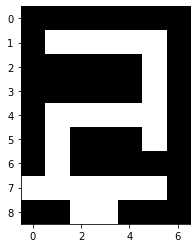

想起


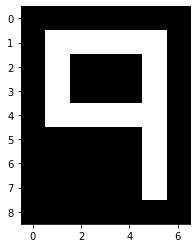

In [80]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)


""" 重み行列Wを計算 """
def fit(dim, data):
    w = np.zeros([dim, dim])
    # for _ in range(10):
    for i in data:
        w += np.outer(i, i.T)

    for i in range(dim):
        w[i][i] = 0     # 対角成分を0にする
    return w

""" 学習データにノイズを与え、テストデータを作成 """
def noise(data, rate):
    test_data = np.copy(data)
    inv = np.random.binomial(n=1, p=rate, size=len(data))
    for i, v in enumerate(data):
        if inv[i]:
            test_data[i] = -1 * v
    return test_data

''' エネルギー関数E(x)を定義し、収束するまで繰り返す '''
def energy(data, w):
    return -0.5 * np.dot(w, np.dot(data, data.T))
    

""" エネルギーが変化しなくなるまで更新を行う """
def predict(test_data, w):
    e_old = float("inf")
    for _ in range(3000):  # self.loop_updateは更新の上限値
        # テストデータの更新とエネルギーの計算
        test_data = np.sign(np.dot(w, test_data))
        e_new = energy(test_data, w)

        # エネルギーが変化しなくなったら打ち切り
        if np.array_equal(e_old, e_new):
            break

        e_old = e_new

    return test_data


def main():
    arr = np.load('numbers.npy')

    two = [2 * i - 1 for i in arr[2]]
    nine = [2 * i - 1 for i in arr[9]]
    # one = [2 * i - 1 for i in one]
    data = np.stack([two, nine])

    # ニューロン数
    n = 63
    # 記憶させたいパターン数
    k = 2
    # 学習データにどの程度ノイズを加えるか
    noise_rate = 0.1
    w = fit(n, data)

    
    flatten_two = data[0].flatten()
    test = noise(flatten_two, noise_rate)

    flatten_test = test.reshape(9, 7)
    print("テストデータ")
    plt.imshow(flatten_test)
    plt.gray()
    plt.show()
    
    predicted = predict(test, w)
    predicted = np.array(predicted, dtype='int')
    
    flatten_predicted = predicted.reshape(9, 7)
    print("想起")
    plt.imshow(flatten_predicted)
    plt.gray()
    plt.show()

if __name__ == '__main__':
    main()

In [81]:
data = [
        np.array([
                0, 0, 0, 0, 0, 0, 0, 
                0,+1,+1,+1,+1,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1,+1,+1,+1,+1, 0,
                0, 0, 0, 0, 0, 0, 0]),

        np.array([
                0, 0, 0, 0, 0, 0, 0,
                0, 0, 0,+1, 0, 0, 0,
                0, 0,+1,+1, 0, 0, 0,
                0, 0, 0,+1, 0, 0, 0,
                0, 0, 0,+1, 0, 0, 0,
                0, 0, 0,+1, 0, 0, 0,
                0, 0, 0,+1, 0, 0, 0,
                0,+1,+1,+1,+1,+1, 0,
                0, 0, 0, 0, 0, 0, 0]),
                

        np.array([
                0,  0,  0,  0,  0,  0,  0,
                0, +1, +1, +1, +1, +1,  0,
                0,  0,  0,  0,  0, +1,  0,
                0,  0,  0,  0,  0, +1,  0,
                0, +1, +1, +1, +1, +1,  0,  
                0, +1,  0,  0,  0,  0,  0,
                0, +1,  0,  0,  0,  0,  0,
                0, +1, +1, +1, +1, +1,  0,
                0,  0,  0,  0,  0,  0,  0]),

        np.array([
                0,  0,  0,  0,  0,  0,  0,
                0, +1, +1, +1, +1, +1,  0,
                0,  0,  0,  0,  0, +1,  0,
                0,  0,  0,  0,  0, +1,  0,
                0,  0,  0, +1, +1, +1,  0, 
                0,  0,  0,  0,  0, +1,  0,
                0,  0,  0,  0,  0, +1,  0,
                0, +1, +1, +1, +1, +1,  0,
                0,  0,  0,  0,  0,  0,  0]),

        np.array([
                0,  0,  0,  0,  0,  0,  0,
                0, +1,  0,  0,  0,  0,  0,
                0, +1,  0,  0,  0,  0,  0,
                0, +1,  0, +1,  0,  0,  0,
                0, +1, +1, +1, +1,  0,  0,
                0,  0,  0, +1,  0,  0,  0,
                0,  0,  0, +1,  0,  0,  0,
                0,  0,  0, +1,  0,  0,  0,
                0,  0,  0,  0,  0,  0,  0]),

        np.array([
                0,  0,  0,  0,  0,  0,  0,
                0, +1, +1, +1, +1, +1,  0,
                0, +1,  0,  0,  0,  0,  0,
                0, +1,  0,  0,  0,  0,  0,
                0, +1, +1, +1, +1, +1,  0,
                0,  0,  0,  0,  0, +1,  0,
                0,  0,  0,  0,  0, +1,  0,
                0, +1, +1, +1, +1, +1,  0,
                0,  0,  0,  0,  0,  0,  0]),

        np.array([
                0,  0,  0,  0,  0,  0,  0,
                0, +1, +1, +1, +1, +1,  0,
                0, +1,  0,  0,  0,  0,  0,
                0, +1,  0,  0,  0,  0,  0,
                0, +1, +1, +1, +1, +1,  0,
                0, +1,  0,  0,  0, +1,  0,
                0, +1,  0,  0,  0, +1,  0,
                0, +1, +1, +1, +1, +1,  0,
                0,  0,  0,  0,  0,  0,  0]),

        np.array([
                0,  0,  0,  0,  0,  0,  0,
                0, +1, +1, +1, +1, +1,  0,
                0,  0,  0,  0,  0, +1,  0,
                0,  0,  0,  0, +1,  0,  0,
                0,  0,  0, +1,  0,  0,  0,
                0,  0, +1,  0,  0,  0,  0,
                0, +1,  0,  0,  0,  0,  0,
                0, +1,  0,  0,  0,  0,  0,
                0,  0,  0,  0,  0,  0,  0]),

        np.array([
                0, 0, 0, 0, 0, 0, 0,
                0,+1,+1,+1,+1,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1,+1,+1,+1,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1,+1,+1,+1,+1, 0,
                0, 0, 0, 0, 0, 0, 0]),

        np.array([ 
                0, 0, 0, 0, 0, 0, 0,
                0,+1,+1,+1,+1,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1, 0, 0, 0,+1, 0,
                0,+1,+1,+1,+1,+1, 0,
                0, 0, 0, 0, 0,+1, 0,
                0, 0, 0, 0, 0,+1, 0,
                0, 0, 0, 0, 0,+1, 0,
                0, 0, 0, 0, 0, 0, 0])
]

In [82]:
np.save('numbers2.npy', data)

In [84]:
data = np.load('numbers.npy')
data[0]

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]])